# Classifier

1. Logistic regression (https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)


functions:
https://scikit-learn.org/stable/modules/feature_selection.html

example:
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py

tut:
https://medium.com/@GouthamPeri/pipeline-with-tuning-scikit-learn-b2789dca9dc2

https://stackoverflow.com/questions/33376078/python-feature-selection-in-pipeline-how-determine-feature-names

## Import packages

In [15]:
import pandas as pd
import sklearn
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [16]:
df = pd.read_pickle("features.pkl")
df.head()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84619 entries, 0 to 84618
Data columns (total 4817 columns):
 #     Column                           Dtype  
---    ------                           -----  
 0     index                            int64  
 1     author                           object 
 2     body_x                           object 
 3     probody                          object 
 4     tokens                           object 
 5     agreeableness                    float64
 6     openness                         float64
 7     conscientiousness                float64
 8     extraversion                     float64
 9     neuroticism                      float64
 10    agree                            int64  
 11    openn                            int64  
 12    consc                            int64  
 13    extra                            int64  
 14    neuro                            int64  
 15    language                         int64  
 16    author_flair_text 

## Trait

In [17]:
#split dataset in features and target variable depending on which trait to focus on
def trait(df, trait_name, startnumber):
    featurelist = df.columns.tolist()
    feature_cols = featurelist[startnumber:]
#     print(len(feature_cols))
    x = df[feature_cols] 
    
    if trait_name == 'agree':
        y = df.agree
    elif trait_name == 'openn':
        y = df.openn
    elif trait_name == 'consc':
        y = df.consc
    elif trait_name == 'extra':
        y = df.extra
    elif trait_name == 'neuro':
        y = df.neuro       
    return x,y 

# x,y = trait(df, 'extra', 35)

## Classifier

1. Logistic regression

In [18]:
def logclassifier(x_train,y_train, x_test):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()
    # fit the model with data
    logreg.fit(x_train,y_train)
#     y_pred=logreg.predict(x_test)    
    return logreg

# logreg = logclassifier(x_train,y_train, x_test)
# y_pred=logreg.predict(x_test)



# ANOVA feature selection for numeric input and categorical output

def create_pipeline(classifier):
    if classifier == "log":
        pipeline = Pipeline([
          ('variance_threshold', VarianceThreshold()),
          ('feature_selection',  SelectKBest(f_classif, k=30)),
          ('classification',LogisticRegression())
        ])
        
    pipeline.fit(x, y)
    return pipeline

# logpipe = create_pipeline('log')
# y_pred=logpipe.predict(x_test)

# print("shape of x before feature selection", x.shape)
# x_new = SelectKBest(f_classif, k=30).fit_transform(x, y)
# print("shape of x after feature selection", x_new.shape)

## Get names of 30 most important features

In [19]:
# get names of the features
def get_names(pipeline):
    features = pipeline.named_steps['feature_selection']
    names = x.columns[features.get_support(indices=True)]
    return names

# names = get_names(logpipe)
# print(names)

## Scores

In [20]:
def scores(y_test, y_pred):
    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    precision=metrics.precision_score(y_test, y_pred)
    recall=metrics.recall_score(y_test, y_pred)
    f_one=metrics.f1_score(y_test, y_pred)
    return accuracy, precision, recall, f_one

# accuracy, precision, recall, f_one = scores(y_test, y_pred)

# print("Accuracy:",accuracy)
# print("Precision:",precision)
# print("Recall:",recall)
# print("F1:",f_one)    

## Create and print confusion matrix

In [21]:
def create_cnfmatrix(y_test, y_pred, plotting=True):
    cnfpipe_matrix = metrics.confusion_matrix(y_test, y_pred)
#     print(cnfpipe_matrix)
    
    if plotting:
        %matplotlib inline
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnfpipe_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        
# cnfmatrix = create_cnfmatrix(y_test, y_pred, True)

# Wrapper

In [22]:
def classify(df, trait_name, startnumber, plotting=True):
    print("Trait to predict: ", trait_name)
    x,y = trait(df, trait_name, startnumber)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
    logpipe = create_pipeline('log')
    y_pred=logpipe.predict(x_test)
    names = get_names(logpipe)
    print("Names of the top 30 features: ", names, "\n")
    cnfmatrix = create_cnfmatrix(y_test, y_pred, plotting=True)
    accuracy, precision, recall, f_one = scores(y_test, y_pred)
    print("Scores:\nAccuracy:",accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1 score:",f_one)

Trait to predict:  agree
Names of the top 30 features:  Index(['dom_x', 'hell', 'noth', 'play', ' di', 'bra', 'cod_y', 'dis', 'dom_y',
       'e d', 'fil', 'gu', 'gu ', 'hel', 'i s', 'im ', 'ip', 'lay', 'm ',
       'm b', 'o w', 'om ', 'rg', 'sc', 'sho', 'sor', 't v', 'ti', 'u ',
       'negative_emotion'],
      dtype='object') 

Scores:
Accuracy: 0.18449539116048216 
Precision: 0.002255508646116477 
Recall: 1.0 
F1 score: 0.004500865551067513


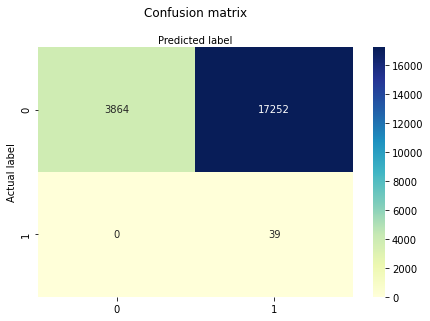

In [23]:
# Agreeableness
classify(df, "agree", 35, plotting=True)

Trait to predict:  openn
Names of the top 30 features:  Index(['dom_x', 'hell', 'noth', 'play', ' di', 'bra', 'cod_y', 'dis', 'dom_y',
       'e d', 'fil', 'gu', 'gu ', 'hel', 'i s', 'im ', 'ip', 'lay', 'm ',
       'm b', 'o w', 'om ', 'rg', 'sc', 'sho', 'sor', 't v', 'ti', 'u ',
       'negative_emotion'],
      dtype='object') 

Scores:
Accuracy: 0.6315291893169463 
Precision: 0.7726562951824648 
Recall: 0.7756618671620994 
F1 score: 0.7741561639866725


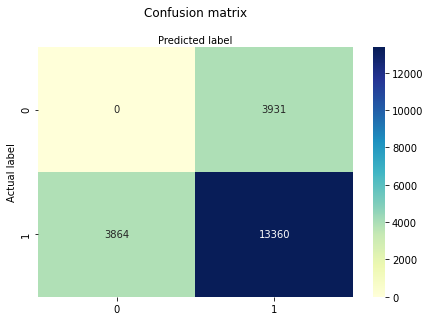

In [24]:
# Openness
classify(df, "openn", 35, plotting=True)

Trait to predict:  consc
Names of the top 30 features:  Index(['dom_x', 'hell', 'noth', 'play', ' di', 'bra', 'cod_y', 'dis', 'dom_y',
       'e d', 'fil', 'gu', 'gu ', 'hel', 'i s', 'im ', 'ip', 'lay', 'm ',
       'm b', 'o w', 'om ', 'rg', 'sc', 'sho', 'sor', 't v', 'ti', 'u ',
       'negative_emotion'],
      dtype='object') 

Scores:
Accuracy: 0.36998345544788463 
Precision: 0.22988838123879474 
Recall: 0.9969902182091799 
F1 score: 0.373625340727512


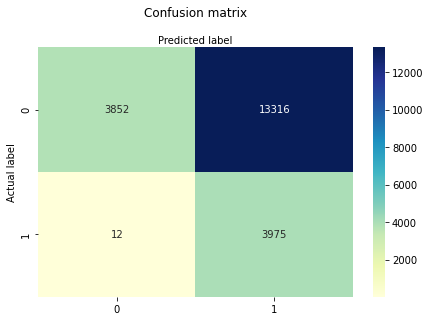

In [25]:
# Conscientiousness
classify(df, "consc", 35, plotting=True)

Trait to predict:  extra
Names of the top 30 features:  Index(['dom_x', 'hell', 'noth', 'play', ' di', 'bra', 'cod_y', 'dis', 'dom_y',
       'e d', 'fil', 'gu', 'gu ', 'hel', 'i s', 'im ', 'ip', 'lay', 'm ',
       'm b', 'o w', 'om ', 'rg', 'sc', 'sho', 'sor', 't v', 'ti', 'u ',
       'negative_emotion'],
      dtype='object') 

Scores:
Accuracy: 0.9793429449302765 
Precision: 0.9747267364524898 
Recall: 1.0 
F1 score: 0.9872016400644311


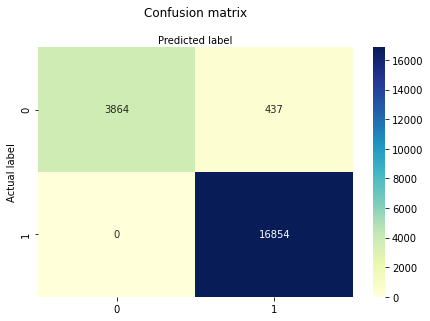

In [26]:
# Extraversion 
classify(df, "extra", 35, plotting=True)

Trait to predict:  neuro
Names of the top 30 features:  Index(['dom_x', 'hell', 'noth', 'play', ' di', 'bra', 'cod_y', 'dis', 'dom_y',
       'e d', 'fil', 'gu', 'gu ', 'hel', 'i s', 'im ', 'ip', 'lay', 'm ',
       'm b', 'o w', 'om ', 'rg', 'sc', 'sho', 'sor', 't v', 'ti', 'u ',
       'negative_emotion'],
      dtype='object') 

Scores:
Accuracy: 0.017253604348853698 
Precision: 0.011740211670811405 
Recall: 0.051984635083226635 
F1 score: 0.01915455746367239


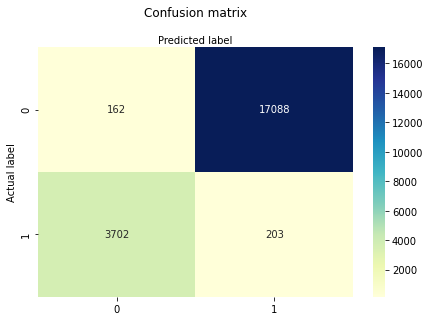

In [27]:
# Neuroticism
classify(df, "neuro", 35, plotting=True)